<a href="https://colab.research.google.com/github/AfzalNMSU/Graph_Link_Prediction/blob/main/LP_Cora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving edges.csv to edges.csv


In [2]:
import pandas as pd
df = pd.read_csv('edges.csv', header=None)
df

0        1
0     100197   193931
1     100197   447250
2     100197   688361
3     100701  1107041
4     100935  1120643
...      ...      ...
5424   98698    84021
5425   99023   578306
5426   99023   578309
5427   99023   578347
5428   99030   578337

[5429 rows x 2 columns]

In [3]:
uploaded = files.upload()


Saving group-edges.csv to group-edges.csv


In [4]:
df2 = pd.read_csv('group-edges.csv', header=None)
df2

0                   1
0     1000012       Rule_Learning
1      100197     Neural_Networks
2      100701          Case_Based
3      100935  Genetic_Algorithms
4      100961     Neural_Networks
...       ...                 ...
2703   989397              Theory
2704   990075          Case_Based
2705    99023     Neural_Networks
2706    99025     Neural_Networks
2707    99030     Neural_Networks

[2708 rows x 2 columns]

In [5]:
  import os
  import networkx as nx
  import pandas as pd
  data_dir = os.path.expanduser("~/data/cora")

In [6]:
uploaded = files.upload()

Saving cora.cites to cora.cites


In [7]:
edgelist = pd.read_csv("cora.cites", sep='\t', header=None, names=["target", "source"])
edgelist["label"] = "cites"
edgelist
#edgelist.shape

target   source  label
0         35     1033  cites
1         35   103482  cites
2         35   103515  cites
3         35  1050679  cites
4         35  1103960  cites
...      ...      ...    ...
5424  853116    19621  cites
5425  853116   853155  cites
5426  853118  1140289  cites
5427  853155   853118  cites
5428  954315  1155073  cites

[5429 rows x 3 columns]

In [8]:
type(edgelist)

pandas.core.frame.DataFrame

In [9]:
edgelistN = edgelist.iloc[0:78]
edgelistN.shape

(78, 3)

In [10]:
Gnx = nx.from_pandas_edgelist(edgelistN, edge_attr="label")
nx.set_node_attributes(Gnx, "paper", "label")

In [11]:
Gnx.nodes

NodeView((1033, 35, 103482, 103515, 1050679, 1103960, 1103985, 1109199, 1112911, 1113438, 1113831, 1114331, 1117476, 1119505, 1119708, 1120431, 1123756, 1125386, 1127430, 1127913, 1128204, 1128227, 1128314, 1128453, 1128945, 1128959, 1128985, 1129018, 1129027, 1129573, 1129683, 1129778, 1130847, 1130856, 1131116, 1131360, 1131557, 1131752, 1133196, 1133338, 1136814, 1137466, 1152421, 1152508, 1153065, 1153280, 1153577, 1153853, 1153943, 1154176, 1154459, 116552, 12576, 128540, 132806, 135130, 141342, 141347, 148170, 15670, 1688, 175291, 178727, 18582, 190697, 190706, 1956, 197054, 198443, 198653, 206371, 210871, 229635, 231249, 248425, 249421, 254923, 259701, 259702))

In [12]:
Gnx.edges

EdgeView([(1033, 35), (35, 103482), (35, 103515), (35, 1050679), (35, 1103960), (35, 1103985), (35, 1109199), (35, 1112911), (35, 1113438), (35, 1113831), (35, 1114331), (35, 1117476), (35, 1119505), (35, 1119708), (35, 1120431), (35, 1123756), (35, 1125386), (35, 1127430), (35, 1127913), (35, 1128204), (35, 1128227), (35, 1128314), (35, 1128453), (35, 1128945), (35, 1128959), (35, 1128985), (35, 1129018), (35, 1129027), (35, 1129573), (35, 1129683), (35, 1129778), (35, 1130847), (35, 1130856), (35, 1131116), (35, 1131360), (35, 1131557), (35, 1131752), (35, 1133196), (35, 1133338), (35, 1136814), (35, 1137466), (35, 1152421), (35, 1152508), (35, 1153065), (35, 1153280), (35, 1153577), (35, 1153853), (35, 1153943), (35, 1154176), (35, 1154459), (35, 116552), (35, 12576), (35, 128540), (35, 132806), (35, 135130), (35, 141342), (35, 141347), (35, 148170), (35, 15670), (35, 1688), (35, 175291), (35, 178727), (35, 18582), (35, 190697), (35, 190706), (35, 1956), (35, 197054), (35, 198443), 

In [13]:
print(nx.number_of_nodes(Gnx))
print(nx.number_of_edges(Gnx))
print(nx.is_directed(Gnx))

79
78
False


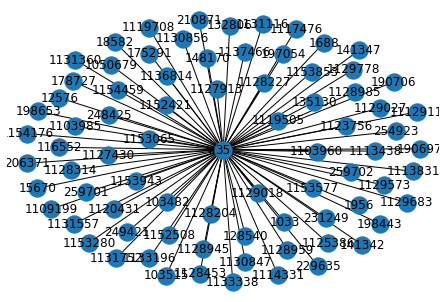

In [14]:
import matplotlib.pyplot as plt

nx.draw(Gnx, with_labels=True)
plt.show()

In [15]:
import numpy as np

nodeset = Gnx.nodes
E = Gnx.edges

nonEdge_candidates = []
for i in nodeset:
    for j in nodeset:
     if (i,j) and (j,i) not in E:
        nonEdge_candidates.append((i,j))
nonEdges = []
np.random.seed(5)
'''
for i in m: #m is number of observed edges, i.e., |E|
    x = np.random.sample(0, len(nonEdge_candidates)) #make sure the syntax
    nonEdges.append(nonEdges_candidates[x])
'''
print(len(nonEdge_candidates))
#print(nonEdge_candidates)

6085


In [16]:
# noEdges with the node itself
nonEdges = []
for i in nodeset:
    for j in nodeset:
     if (i,j) in nonEdge_candidates:
        if i<=j:
            nonEdges.append((i,j))

print(len(nonEdges))
#print(nonEdges)

3082


In [17]:
# noEdges without the node itself
nonEdges = []
for i in nodeset:
    for j in nodeset:
     if (i,j) in nonEdge_candidates:
        if i<j:
            nonEdges.append((i,j))

print(len(nonEdges))
#print(nonEdges)

3003


In [18]:
type(Gnx)

networkx.classes.graph.Graph

In [19]:
edges=Gnx.edges
type(edges)

networkx.classes.reportviews.EdgeView

In [20]:
print(nx.number_of_nodes(Gnx))
print(nx.number_of_edges(Gnx))
print(nx.is_directed(Gnx))

79
78
False


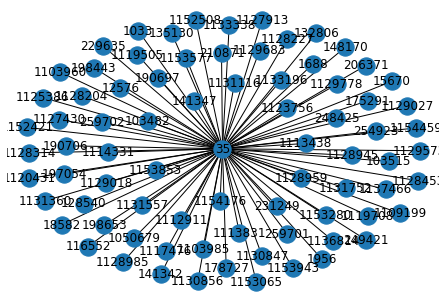

In [21]:
nx.draw(Gnx, with_labels=True)
plt.show()

In [22]:
type(nonEdges)

list

In [23]:
Gnxneg = nx.Graph(nonEdges)
type(Gnxneg)

networkx.classes.graph.Graph

In [24]:
type(Gnxneg.edges)

networkx.classes.reportviews.EdgeView

In [25]:
print("Number of nodes: 79")
print("Number of possible edges:", 79*78/2)
print("Number of edges: 78")
print("Number of nonedges: (3081-78) =",3081-78)

Number of nodes: 79
Number of possible edges: 3081.0
Number of edges: 78
Number of nonedges: (3081-78) = 3003


In [26]:
print(nx.number_of_nodes(Gnxneg))
print(nx.number_of_edges(Gnxneg))
print(nx.is_directed(Gnxneg))

78
3003
False


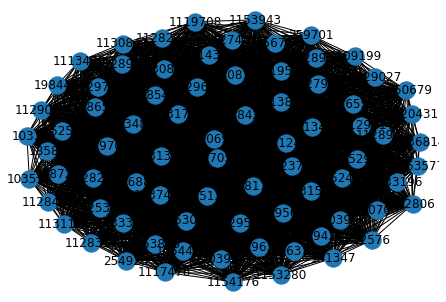

In [27]:
nx.draw(Gnxneg, with_labels=True)
plt.show()

In [28]:
#Line graph of Karate club
LG_Gnx = nx.line_graph(Gnx, create_using=None)
#print(sorted(map(sorted, LG_KG.edges())))

In [29]:
len(LG_Gnx)

78

In [30]:
type(LG_Gnx)

networkx.classes.graph.Graph

In [31]:
print(nx.number_of_nodes(LG_Gnx))
print(nx.number_of_edges(LG_Gnx))
print(nx.is_directed(LG_Gnx))

78
3003
False


In [32]:
LG_Gnx.nodes

NodeView(((35, 1033), (35, 103482), (35, 103515), (35, 1050679), (35, 1103960), (35, 1103985), (35, 1109199), (35, 1112911), (35, 1113438), (35, 1113831), (35, 1114331), (35, 1117476), (35, 1119505), (35, 1119708), (35, 1120431), (35, 1123756), (35, 1125386), (35, 1127430), (35, 1127913), (35, 1128204), (35, 1128227), (35, 1128314), (35, 1128453), (35, 1128945), (35, 1128959), (35, 1128985), (35, 1129018), (35, 1129027), (35, 1129573), (35, 1129683), (35, 1129778), (35, 1130847), (35, 1130856), (35, 1131116), (35, 1131360), (35, 1131557), (35, 1131752), (35, 1133196), (35, 1133338), (35, 1136814), (35, 1137466), (35, 1152421), (35, 1152508), (35, 1153065), (35, 1153280), (35, 1153577), (35, 1153853), (35, 1153943), (35, 1154176), (35, 1154459), (35, 116552), (35, 12576), (35, 128540), (35, 132806), (35, 135130), (35, 141342), (35, 141347), (35, 148170), (35, 15670), (35, 1688), (35, 175291), (35, 178727), (35, 18582), (35, 190697), (35, 190706), (35, 1956), (35, 197054), (35, 198443), 

In [33]:
#LG_KG.edges

In [34]:
#Adjacency list
print("Adjacency List of 𝐺(𝐸,𝑉):\n")
[(n, nbrdict) for n, nbrdict in LG_Gnx.adjacency()]

Adjacency List of 𝐺(𝐸,𝑉):



[((35, 1033),
  {(35, 1688): {},
   (35, 1956): {},
   (35, 12576): {},
   (35, 15670): {},
   (35, 18582): {},
   (35, 103482): {},
   (35, 103515): {},
   (35, 116552): {},
   (35, 128540): {},
   (35, 132806): {},
   (35, 135130): {},
   (35, 141342): {},
   (35, 141347): {},
   (35, 148170): {},
   (35, 175291): {},
   (35, 178727): {},
   (35, 190697): {},
   (35, 190706): {},
   (35, 197054): {},
   (35, 198443): {},
   (35, 198653): {},
   (35, 206371): {},
   (35, 210871): {},
   (35, 229635): {},
   (35, 231249): {},
   (35, 248425): {},
   (35, 249421): {},
   (35, 254923): {},
   (35, 259701): {},
   (35, 259702): {},
   (35, 1050679): {},
   (35, 1103960): {},
   (35, 1103985): {},
   (35, 1109199): {},
   (35, 1112911): {},
   (35, 1113438): {},
   (35, 1113831): {},
   (35, 1114331): {},
   (35, 1117476): {},
   (35, 1119505): {},
   (35, 1119708): {},
   (35, 1120431): {},
   (35, 1123756): {},
   (35, 1125386): {},
   (35, 1127430): {},
   (35, 1127913): {},
   (35, 112

In [109]:
#Adjacency matrix
def adjacency_matrix(g, nodelist=None, weight="weight"):
    return nx.to_scipy_sparse_matrix(g, nodelist=nodelist, weight=weight)

a = adjacency_matrix(LG_Gnx, nodelist=None, weight="weight")
print(a)

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 14)	1
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	1
  (0, 21)	1
  (0, 22)	1
  (0, 23)	1
  (0, 24)	1
  (0, 25)	1
  :	:
  (77, 52)	1
  (77, 53)	1
  (77, 54)	1
  (77, 55)	1
  (77, 56)	1
  (77, 57)	1
  (77, 58)	1
  (77, 59)	1
  (77, 60)	1
  (77, 61)	1
  (77, 62)	1
  (77, 63)	1
  (77, 64)	1
  (77, 65)	1
  (77, 66)	1
  (77, 67)	1
  (77, 68)	1
  (77, 69)	1
  (77, 70)	1
  (77, 71)	1
  (77, 72)	1
  (77, 73)	1
  (77, 74)	1
  (77, 75)	1
  (77, 76)	1


In [110]:
print("Adjacency Matrix of 𝐺(𝐸,𝑉):")
a.todense()

Adjacency Matrix of 𝐺(𝐸,𝑉):


matrix([[0, 1, 1, ..., 1, 1, 1],
        [1, 0, 1, ..., 1, 1, 1],
        [1, 1, 0, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 1, 1],
        [1, 1, 1, ..., 1, 0, 1],
        [1, 1, 1, ..., 1, 1, 0]], dtype=int64)

In [111]:
import pandas
import networkx as nx

A = nx.to_pandas_adjacency(LG_Gnx)

print(A)

               (35, 1033)  (35, 103482)  ...  (35, 259701)  (35, 259702)
(35, 1033)            0.0           1.0  ...           1.0           1.0
(35, 103482)          1.0           0.0  ...           1.0           1.0
(35, 103515)          1.0           1.0  ...           1.0           1.0
(35, 1050679)         1.0           1.0  ...           1.0           1.0
(35, 1103960)         1.0           1.0  ...           1.0           1.0
...                   ...           ...  ...           ...           ...
(35, 248425)          1.0           1.0  ...           1.0           1.0
(35, 249421)          1.0           1.0  ...           1.0           1.0
(35, 254923)          1.0           1.0  ...           1.0           1.0
(35, 259701)          1.0           1.0  ...           0.0           1.0
(35, 259702)          1.0           1.0  ...           1.0           0.0

[78 rows x 78 columns]


In [112]:
#Degree Matrix
import numpy as np

degree = np.zeros(len(A)) # initialize list to hold values of degree
print(degree)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [113]:
# calculate the sums along rows and sum along columns
colsum = a.sum(axis=0)
rowsum = a.sum(axis=1)

#"a" & "A" duitai adjacency matrix indicate kortese. kintu duitar format duirokom. Tai duitai vinno vinno jaygay use kora hoise.

In [114]:
# loop through matrix and add up all degree connections
for j in range(0, len(A)):
    degree[j] = colsum[0,j] + rowsum[j,0]
    
# get the diagonal entries to correct the for loop oversumming
Dia = a.diagonal()
d = Dia.flat
diagMat = list(d)

# print the degree of connectivity matrix
D = np.diag(degree - diagMat)
print("Degree Matrix of 𝐺(𝐸,𝑉):\n")
print(D)

Degree Matrix of 𝐺(𝐸,𝑉):

[[154.   0.   0. ...   0.   0.   0.]
 [  0. 154.   0. ...   0.   0.   0.]
 [  0.   0. 154. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 154.   0.   0.]
 [  0.   0.   0. ...   0. 154.   0.]
 [  0.   0.   0. ...   0.   0. 154.]]


In [115]:
D.shape

(78, 78)

In [116]:
print("Laplacian Matrix of 𝐺(𝐸,𝑉):\n")
L = D-A
print(L)

Laplacian Matrix of 𝐺(𝐸,𝑉):

               (35, 1033)  (35, 103482)  ...  (35, 259701)  (35, 259702)
(35, 1033)          154.0          -1.0  ...          -1.0          -1.0
(35, 103482)         -1.0         154.0  ...          -1.0          -1.0
(35, 103515)         -1.0          -1.0  ...          -1.0          -1.0
(35, 1050679)        -1.0          -1.0  ...          -1.0          -1.0
(35, 1103960)        -1.0          -1.0  ...          -1.0          -1.0
...                   ...           ...  ...           ...           ...
(35, 248425)         -1.0          -1.0  ...          -1.0          -1.0
(35, 249421)         -1.0          -1.0  ...          -1.0          -1.0
(35, 254923)         -1.0          -1.0  ...          -1.0          -1.0
(35, 259701)         -1.0          -1.0  ...         154.0          -1.0
(35, 259702)         -1.0          -1.0  ...          -1.0         154.0

[78 rows x 78 columns]


In [117]:
#L

In [118]:
# eigen decomposition using numpy
import numpy as np
eigen_vals, eigen_vecs = np.linalg.eig(L)

In [119]:
eigen_vals.shape
#print('\nEigenvalues \n%s' % eigen_vals)

(78,)

In [120]:
eigen_vecs.shape
#print('\nEigenvectors \n%s' % eigen_vecs)

(78, 78)

In [121]:
#checking to get back the L again
dia_eigen_vals = np.diag(eigen_vals)
dia_eigen_vals.shape

(78, 78)

In [122]:
L_new = eigen_vecs.dot(dia_eigen_vals).dot(eigen_vecs.T)

print(L_new.shape)
#print(L_new)

(78, 78)


In [123]:
# we can also compute in this way. both are similar
from numpy import linalg as LA
eigen_vals, eigen_vecs = LA.eig(L)

print(eigen_vals.shape)
print(eigen_vecs.shape)

(78,)
(78, 78)


In [126]:
# we can compute using scipy. We can determine the "k" values and in case of lower vlue of 'k' it works faster. 
# However, it works for array not for data frame, np.linalg.eig works for datafrmae directly.
# For scipy.sparse.linalg we have to convert the datafrane into a numpy array first

from scipy.sparse.linalg import eigsh

L_array = L.to_numpy()
eigenvalues, eigenvectors = eigsh(L_array, k=4)


#print(eigenvalues)
#print(eigenvectors)
print(eigenvalues.shape)
print(eigenvectors.shape)

(4,)
(78, 4)


In [127]:
#print(eigenvalues)
#print(eigenvectors)

In [128]:
z = eigenvectors

In [129]:
# Printing cosine similarities for eigenvectors
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
A_prime = pd.DataFrame(cosine_similarity(z))
print(A_prime)

          0         1         2   ...        75        76        77
0   1.000000  0.863356 -0.769543  ... -0.565264 -0.600108 -0.733553
1   0.863356  1.000000 -0.704378  ... -0.352202 -0.169951 -0.485859
2  -0.769543 -0.704378  1.000000  ...  0.890116  0.504408  0.662932
3   0.265388 -0.055212 -0.010349  ... -0.278708 -0.232514  0.120657
4  -0.738332 -0.667360  0.287763  ...  0.166116  0.146264  0.147172
..       ...       ...       ...  ...       ...       ...       ...
73  0.379699  0.288589  0.137207  ...  0.135447  0.058971  0.197210
74 -0.472803 -0.556850  0.765281  ...  0.517310  0.388382  0.711878
75 -0.565264 -0.352202  0.890116  ...  1.000000  0.563023  0.517215
76 -0.600108 -0.169951  0.504408  ...  0.563023  1.000000  0.889560
77 -0.733553 -0.485859  0.662932  ...  0.517215  0.889560  1.000000

[78 rows x 78 columns]


In [130]:
# Printing cosine similarities for eigenvectors
from sklearn.metrics.pairwise import cosine_similarity
A_prime = cosine_similarity(z)
print(A_prime)

[[ 1.          0.86335579 -0.76954315 ... -0.56526374 -0.60010834
  -0.7335526 ]
 [ 0.86335579  1.         -0.70437787 ... -0.3522017  -0.1699512
  -0.48585937]
 [-0.76954315 -0.70437787  1.         ...  0.89011648  0.50440828
   0.66293228]
 ...
 [-0.56526374 -0.3522017   0.89011648 ...  1.          0.56302266
   0.51721494]
 [-0.60010834 -0.1699512   0.50440828 ...  0.56302266  1.
   0.88956039]
 [-0.7335526  -0.48585937  0.66293228 ...  0.51721494  0.88956039
   1.        ]]


In [131]:
# Frobenius norm using numpy
# ord=None, norm for matrices='Frobenius norm', norm for vectors='2-norm'

#A_prime_np = A_prime.to_numpy()

In [132]:
print(np.linalg.norm(A - A_prime, ord='fro'))

87.10425074093578


In [133]:
# Frobenius norm using scipy
from scipy.linalg import norm

norm(A-A_prime, 'fro')

87.10425074093578

In [134]:
errors = []

for i in range(1,5):
    eigenvalues, eigenvectors = eigsh(L_array, k=i)
    z = eigenvectors

    A_prime = cosine_similarity(z)

    Frobenius_norm = norm(A-A_prime, 'fro')

    errors.append(Frobenius_norm)

print(errors)

[108.87607634370372, 95.70315282843328, 91.62463053595916, 86.00005982588824]


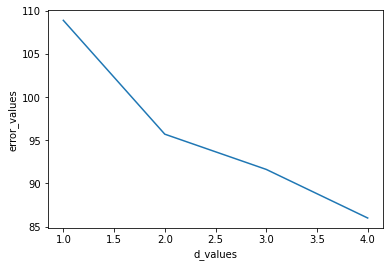

In [135]:
import matplotlib.pyplot as plt

d= [1,2,3,4]
plt.plot(d,errors)
plt.xlabel('d_values')
plt.ylabel('error_values')
plt.show()

In [136]:
errors = []

for i in range(1,5):
    eigenvalues, eigenvectors = eigsh(L_array, k=i)
    z = eigenvectors

    A_prime = cosine_similarity(z)

    Frobenius_norm = norm(A-A_prime, 'fro')

    errors.append([i,Frobenius_norm])

print(errors)

[[1, 110.0817877761803], [2, 95.72883780901876], [3, 89.37074069107548], [4, 87.92441504321685]]


In [137]:
df = pd.DataFrame(errors, columns=['d', 'errors'])
df

d      errors
0  1  110.081788
1  2   95.728838
2  3   89.370741
3  4   87.924415

In [138]:
# Specific line graph
import plotly.express as px  
px.line(df, x="d", y="errors")

In [139]:
#area graph
px.area(df, x="d", y="errors")

In [140]:
#violin chart
px.violin(df,  y="errors")

In [141]:
#Line graph of Karate club NEGATIVE
LG_Gnxneg = nx.line_graph(Gnxneg, create_using=None)
#print(sorted(map(sorted, LG_KGneg.edges())))

In [142]:
print(nx.number_of_nodes(LG_Gnxneg))
print(nx.number_of_edges(LG_Gnxneg))
print(nx.is_directed(LG_Gnxneg))

3003
228228
False


In [143]:
#Adjacency list
print("Adjacency List of 𝐺(𝐸,𝑉):\n")
[(n, nbrdict) for n, nbrdict in LG_Gnxneg.adjacency()]

Adjacency List of 𝐺(𝐸,𝑉):



[((148170, 1128204),
  {(1033, 148170): {},
   (1033, 1128204): {},
   (1688, 148170): {},
   (1688, 1128204): {},
   (1956, 148170): {},
   (1956, 1128204): {},
   (12576, 148170): {},
   (12576, 1128204): {},
   (15670, 148170): {},
   (15670, 1128204): {},
   (18582, 148170): {},
   (18582, 1128204): {},
   (103482, 148170): {},
   (103482, 1128204): {},
   (103515, 148170): {},
   (103515, 1128204): {},
   (116552, 148170): {},
   (116552, 1128204): {},
   (128540, 148170): {},
   (128540, 1128204): {},
   (132806, 148170): {},
   (132806, 1128204): {},
   (135130, 148170): {},
   (135130, 1128204): {},
   (141342, 148170): {},
   (141342, 1128204): {},
   (141347, 148170): {},
   (141347, 1128204): {},
   (148170, 175291): {},
   (148170, 178727): {},
   (148170, 190697): {},
   (148170, 190706): {},
   (148170, 197054): {},
   (148170, 198443): {},
   (148170, 198653): {},
   (148170, 206371): {},
   (148170, 210871): {},
   (148170, 229635): {},
   (148170, 231249): {},
   (1481

In [144]:
#Adjacency matrix
def adjacency_matrix(g, nodelist=None, weight="weight"):
    return nx.to_scipy_sparse_matrix(g, nodelist=nodelist, weight=weight)

aNeg = adjacency_matrix(LG_Gnxneg, nodelist=None, weight="weight")
print(aNeg)

  (0, 1)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 21)	1
  (0, 23)	1
  (0, 34)	1
  (0, 81)	1
  (0, 91)	1
  (0, 126)	1
  (0, 137)	1
  (0, 154)	1
  (0, 166)	1
  (0, 229)	1
  (0, 245)	1
  (0, 246)	1
  (0, 264)	1
  (0, 320)	1
  (0, 352)	1
  (0, 363)	1
  (0, 364)	1
  (0, 371)	1
  (0, 374)	1
  (0, 375)	1
  (0, 381)	1
  :	:
  (3002, 2606)	1
  (3002, 2649)	1
  (3002, 2650)	1
  (3002, 2693)	1
  (3002, 2694)	1
  (3002, 2698)	1
  (3002, 2699)	1
  (3002, 2705)	1
  (3002, 2737)	1
  (3002, 2771)	1
  (3002, 2777)	1
  (3002, 2815)	1
  (3002, 2901)	1
  (3002, 2904)	1
  (3002, 2914)	1
  (3002, 2915)	1
  (3002, 2933)	1
  (3002, 2943)	1
  (3002, 2954)	1
  (3002, 2965)	1
  (3002, 2980)	1
  (3002, 2993)	1
  (3002, 2996)	1
  (3002, 2997)	1
  (3002, 2999)	1


In [145]:
print("Adjacency Matrix of 𝐺(𝐸,𝑉):")
aNeg.todense()

Adjacency Matrix of 𝐺(𝐸,𝑉):


matrix([[0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [146]:
import pandas
import networkx as nx

Aneg = nx.to_pandas_adjacency(LG_Gnxneg)

print(Aneg)

                    (148170, 1128204)  ...  (1114331, 1152421)
(148170, 1128204)                 0.0  ...                 0.0
(1119505, 1128204)                1.0  ...                 0.0
(18582, 1103960)                  0.0  ...                 0.0
(1103960, 1127430)                0.0  ...                 0.0
(1127913, 1153280)                0.0  ...                 0.0
...                               ...  ...                 ...
(175291, 1128204)                 1.0  ...                 0.0
(1114331, 1128227)                0.0  ...                 1.0
(15670, 1127430)                  0.0  ...                 0.0
(15670, 1136814)                  0.0  ...                 0.0
(1114331, 1152421)                0.0  ...                 0.0

[3003 rows x 3003 columns]


In [147]:
#Degree Matrix
import numpy as np

degree = np.zeros(len(Aneg)) # initialize list to hold values of degree
print(degree)


[0. 0. 0. ... 0. 0. 0.]


In [148]:
# calculate the sums along rows and sum along columns
colsum = aNeg.sum(axis=0)
rowsum = aNeg.sum(axis=1)

#"a" & "A" duitai adjacency matrix indicate kortese. kintu duitar format duirokom. Tai duitai vinno vinno jaygay use kora hoise.

In [149]:
# loop through matrix and add up all degree connections
for j in range(0, len(Aneg)):
    degree[j] = colsum[0,j] + rowsum[j,0]
    
# get the diagonal entries to correct the for loop oversumming
Dia = aNeg.diagonal()
d = Dia.flat
diagMat = list(d)

# print the degree of connectivity matrix
Dneg = np.diag(degree - diagMat)
print("Degree Matrix of 𝐺(𝐸,𝑉):\n")
print(Dneg)

Degree Matrix of 𝐺(𝐸,𝑉):

[[304.   0.   0. ...   0.   0.   0.]
 [  0. 304.   0. ...   0.   0.   0.]
 [  0.   0. 304. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 304.   0.   0.]
 [  0.   0.   0. ...   0. 304.   0.]
 [  0.   0.   0. ...   0.   0. 304.]]


In [150]:
print("Laplacian Matrix of 𝐺(𝐸,𝑉):\n")
Lneg = Dneg-Aneg
print(Lneg)

Laplacian Matrix of 𝐺(𝐸,𝑉):

                    (148170, 1128204)  ...  (1114331, 1152421)
(148170, 1128204)               304.0  ...                 0.0
(1119505, 1128204)               -1.0  ...                 0.0
(18582, 1103960)                  0.0  ...                 0.0
(1103960, 1127430)                0.0  ...                 0.0
(1127913, 1153280)                0.0  ...                 0.0
...                               ...  ...                 ...
(175291, 1128204)                -1.0  ...                 0.0
(1114331, 1128227)                0.0  ...                -1.0
(15670, 1127430)                  0.0  ...                 0.0
(15670, 1136814)                  0.0  ...                 0.0
(1114331, 1152421)                0.0  ...               304.0

[3003 rows x 3003 columns]


In [151]:
# eigen decomposition using numpy
import numpy as np
eigen_vals_neg, eigen_vecs_neg = np.linalg.eig(Lneg)

In [152]:
eigen_vals_neg.shape
#print('\nEigenvalues \n%s' % eigen_vals)

(3003,)

In [153]:
eigen_vecs_neg.shape
#print('\nEigenvectors \n%s' % eigen_vecs)

(3003, 3003)

In [154]:
#checking to get back the L again
dia_eigen_vals_neg = np.diag(eigen_vals_neg)
dia_eigen_vals_neg.shape

(3003, 3003)

In [155]:
Lneg_new = eigen_vecs_neg.dot(dia_eigen_vals_neg).dot(eigen_vecs_neg.T)

print(Lneg_new.shape)
#print(Lneg_new)

(3003, 3003)


In [156]:
# we can also compute in this way. both are similar
from numpy import linalg as LA
eigen_vals_neg, eigen_vecs_neg = LA.eig(Lneg)

print(eigen_vals_neg.shape)
print(eigen_vecs_neg.shape)

(3003,)
(3003, 3003)


In [157]:
# we can compute using scipy. We can determine the "k" values and in case of lower vlue of 'k' it works faster. 
# However, it works for array not for data frame, np.linalg.eig works for datafrmae directly.
# For scipy.sparse.linalg we have to convert the datafrane into a numpy array first

from scipy.sparse.linalg import eigsh

L_array = Lneg.to_numpy()
eigenvaluesNeg, eigenvectorsNeg = eigsh(L_array, k=4)


#print(eigenvalues)
#print(eigenvectors)
print(eigenvaluesNeg.shape)
print(eigenvectorsNeg.shape)

(4,)
(3003, 4)


In [158]:
# we can compute using scipy. We can determine the "k" values and in case of lower vlue of 'k' it works faster. 
# However, it works for array not for data frame, np.linalg.eig works for datafrmae directly.
# For scipy.sparse.linalg we have to convert the datafrane into a numpy array first

from scipy.sparse.linalg import eigsh

L_array = Lneg.to_numpy()
eigenvaluesNeg, eigenvectorsNeg = eigsh(L_array, k=4)



#print(eigenvalues)
#print(eigenvectors)
print(eigenvaluesNeg.shape)
print(eigenvectorsNeg.shape)

(4,)
(3003, 4)


In [159]:
#print(eigenvalues)
#print(eigenvectors)

In [160]:
#np.split(eigenvectorsNeg, 3)

In [161]:
eigenvectorsNeg = eigenvectorsNeg[0:78]
eigenvectorsNeg.shape

(78, 4)

In [162]:
print(eigenvectors.shape)

(78, 4)


In [163]:
zNeg = eigenvectorsNeg

In [164]:
# Printing cosine similarities for eigenvectors
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
A_prime = pd.DataFrame(cosine_similarity(zNeg))
print(A_prime)

          0         1         2   ...        75        76        77
0   1.000000  0.696659 -0.733849  ...  0.424256  0.260348  0.943312
1   0.696659  1.000000 -0.404584  ... -0.087995  0.504408  0.862906
2  -0.733849 -0.404584  1.000000  ...  0.065837 -0.603132 -0.595972
3   0.777310  0.859608 -0.671641  ... -0.170832  0.416608  0.893831
4   0.048827  0.177282 -0.071088  ... -0.391102 -0.269791  0.237740
..       ...       ...       ...  ...       ...       ...       ...
73  0.843251  0.872738 -0.638353  ... -0.019948  0.328839  0.949828
74 -0.747767 -0.178003  0.442455  ... -0.848684  0.043169 -0.535102
75  0.424256 -0.087995  0.065837  ...  1.000000 -0.517126  0.266969
76  0.260348  0.504408 -0.603132  ... -0.517126  1.000000  0.249702
77  0.943312  0.862906 -0.595972  ...  0.266969  0.249702  1.000000

[78 rows x 78 columns]


In [165]:
# Printing cosine similarities for eigenvectors
from sklearn.metrics.pairwise import cosine_similarity
A_prime = cosine_similarity(zNeg)
print(A_prime)
print(len(A_prime))

[[ 1.          0.69665894 -0.73384907 ...  0.42425554  0.26034788
   0.94331226]
 [ 0.69665894  1.         -0.40458394 ... -0.08799481  0.50440818
   0.86290632]
 [-0.73384907 -0.40458394  1.         ...  0.06583675 -0.60313222
  -0.59597193]
 ...
 [ 0.42425554 -0.08799481  0.06583675 ...  1.         -0.5171261
   0.26696872]
 [ 0.26034788  0.50440818 -0.60313222 ... -0.5171261   1.
   0.24970152]
 [ 0.94331226  0.86290632 -0.59597193 ...  0.26696872  0.24970152
   1.        ]]
78


In [166]:
# Frobenius norm using numpy
# ord=None, norm for matrices='Frobenius norm', norm for vectors='2-norm'

#A_prime_np = A_prime.to_numpy()

In [167]:
Aneg_new = np.array(Aneg)

Aneg_new = Aneg_new[0:78,0:78]

In [168]:
Aneg_new.shape

(78, 78)

In [169]:
print(np.linalg.norm(Aneg_new - A_prime, ord='fro'))

47.285092879730044


In [170]:
# Frobenius norm using scipy
from scipy.linalg import norm

norm(Aneg_new-A_prime, 'fro')

47.285092879730044

In [171]:
errors = []

for i in range(1,5):
    eigenvaluesNeg, eigenvectorsNeg = eigsh(Aneg_new, k=i)
    zNeg = eigenvectorsNeg

    A_prime = cosine_similarity(zNeg)

    Frobenius_norm = norm(Aneg_new-A_prime, 'fro')

    errors.append(Frobenius_norm)

print(errors)

[75.69676347110224, 52.88717124646429, 43.353810397887415, 39.40945737536423]


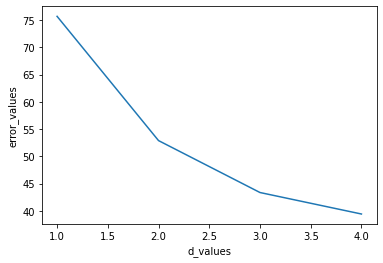

In [172]:
import matplotlib.pyplot as plt

d= [1,2,3,4]
plt.plot(d,errors)
plt.xlabel('d_values')
plt.ylabel('error_values')
plt.show()

In [173]:
# Specific line graph
import plotly.express as px  
px.line(df, x="d", y="errors")

In [174]:
#area graph
px.area(df, x="d", y="errors")

In [175]:
#violin chart
px.violin(df,  y="errors")

In [74]:
#concataning eigenvectors & eigenvectorsNeg
eigenvectorsConcat = np.concatenate((eigenvectors, eigenvectorsNeg), axis=0)
eigenvectorsConcat.shape
#print(eigenvectorsConcat)

(156, 4)

In [75]:
#concataning targets y & yNeg
y = np.repeat(1, 78)
yNeg = np.repeat(0, 78)
yConcat = np.concatenate((y, yNeg), axis=0)
yConcat.shape

(156,)

In [76]:
yConcat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [77]:
# creating a dataframe using eigenvectorsConcat & yConcat
embeddings = []
for id in range(156):
  embedding = eigenvectorsConcat[id]
  #club = KG.nodes[id]['club']
  embeddings.append([embedding[0], embedding[1], embedding[2], embedding[3], yConcat[id]])
df = pd.DataFrame(embeddings, columns=['x_a', 'x_b', 'x_c', 'x_d', 'y'])
df

x_a       x_b       x_c       x_d  y
0   -0.017033  0.150730 -0.469290 -0.038139  1
1    0.023019  0.179425 -0.481504 -0.056797  1
2   -0.070837  0.123088 -0.028653 -0.096502  1
3    0.208613 -0.051562  0.002099  0.011731  1
4    0.001424  0.019020  0.015326  0.000051  1
..        ...       ...       ...       ... ..
151  0.046813 -0.098917 -0.001745 -0.027560  0
152  0.000911 -0.000851  0.002922  0.000998  0
153 -0.003881 -0.000101  0.000163  0.014187  0
154  0.007223  0.010625  0.013642  0.005168  0
155 -0.000914  0.006345 -0.020037 -0.022950  0

[156 rows x 5 columns]

## correlation_coefficient

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
import numpy as np
cols = ['x_a','x_b','x_c','x_d','y']
correlation_coefficient = np.corrcoef(df[cols].values.T)
print(correlation_coefficient)

[[ 1.         -0.01426484  0.00584794 -0.01512523 -0.02090982]
 [-0.01426484  1.          0.05349906 -0.02153001  0.03587037]
 [ 0.00584794  0.05349906  1.         -0.02472714  0.01630259]
 [-0.01512523 -0.02153001 -0.02472714  1.         -0.0186735 ]
 [-0.02090982  0.03587037  0.01630259 -0.0186735   1.        ]]


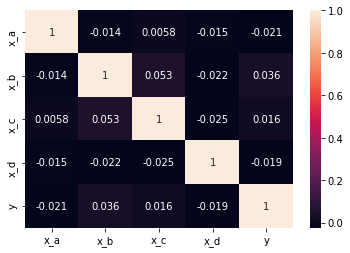

In [80]:
sns.heatmap(correlation_coefficient, annot=True,
yticklabels = cols, xticklabels=cols)
plt.show()

## SHUFFLING

In [81]:
# converting dataframe to numpy for suffling
dfNumpy = df.to_numpy(dtype=None, copy=False)
dfNumpy

array([[-1.70332535e-02,  1.50729506e-01, -4.69289676e-01,
        -3.81385913e-02,  1.00000000e+00],
       [ 2.30186364e-02,  1.79425355e-01, -4.81504151e-01,
        -5.67970969e-02,  1.00000000e+00],
       [-7.08368129e-02,  1.23087643e-01, -2.86533501e-02,
        -9.65017767e-02,  1.00000000e+00],
       [ 2.08613259e-01, -5.15620785e-02,  2.09873838e-03,
         1.17308696e-02,  1.00000000e+00],
       [ 1.42392269e-03,  1.90199112e-02,  1.53264728e-02,
         5.07183875e-05,  1.00000000e+00],
       [ 8.46866507e-02,  5.15389967e-02,  1.38223283e-01,
         8.29083885e-03,  1.00000000e+00],
       [-3.20133490e-01,  4.98237093e-02, -6.44358144e-03,
         2.20839866e-01,  1.00000000e+00],
       [ 5.46497000e-02,  1.22654576e-01,  7.50834672e-02,
        -1.00328826e-02,  1.00000000e+00],
       [-3.55038008e-02,  2.93593432e-02,  7.16370510e-02,
        -3.04683950e-02,  1.00000000e+00],
       [ 6.02633346e-02,  2.12014512e-02,  1.17350370e-02,
         4.49584458e-03

In [82]:
#SHUFFLING
np.random.shuffle(dfNumpy)
dfNumpy_suf = dfNumpy
dfNumpy_suf

array([[ 2.55008416e-03,  2.98500630e-02,  3.11841360e-02,
         3.51130486e-04,  0.00000000e+00],
       [ 9.11050898e-04, -8.50687839e-04,  2.92207935e-03,
         9.98366906e-04,  0.00000000e+00],
       [-2.15691836e-02, -8.65543949e-04,  4.81095881e-02,
         3.95298032e-02,  1.00000000e+00],
       [-4.04487757e-03, -1.70125059e-02, -5.13428039e-03,
         1.15667259e-02,  0.00000000e+00],
       [ 3.07364344e-02,  2.54345069e-02, -1.45946268e-02,
        -8.10823186e-03,  1.00000000e+00],
       [-2.26554145e-01,  3.11029657e-01,  7.83768407e-02,
         6.20649890e-03,  1.00000000e+00],
       [ 3.89906919e-02, -2.21671344e-01, -2.58689275e-01,
         1.30749240e-01,  0.00000000e+00],
       [-7.91788826e-02, -1.53995982e-01,  2.19916416e-02,
         2.67374073e-02,  0.00000000e+00],
       [-1.43458525e-01, -1.65410478e-02,  3.75302297e-02,
         2.70567907e-02,  1.00000000e+00],
       [-1.04714069e-01, -1.29333269e-02,  4.07088700e-02,
        -4.64364919e-03

## NORMALIZATION

In [83]:
# normalization example
from sklearn.preprocessing import Normalizer
X = [[4, 1, 2, 2],
     [1, 3, 9, 3],
     [5, 7, 5, 1]]
transformer = Normalizer(norm='l2', copy=False).fit(X)  # fit does nothing.
transformer

transformer.transform(X)

array([[0.8, 0.2, 0.4, 0.4],
       [0.1, 0.3, 0.9, 0.3],
       [0.5, 0.7, 0.5, 0.1]])

In [84]:
from sklearn.preprocessing import Normalizer
dfNumpy_suf_norm = Normalizer(norm='max', copy=False).fit(dfNumpy_suf)
dfNumpy_suf_norm

# axis=0 refers to normalizing each features. axis=1 refers to normalizing samples
# jodi l1/l2 norm deya hoy sekhetre y er je value pawa jay seta diye train kora jayna. kenona protita individual value hoye jay tokhon

Normalizer(copy=False, norm='max')

In [85]:
dfNumpy = dfNumpy_suf_norm.transform(dfNumpy_suf)

In [86]:
type(dfNumpy)

numpy.ndarray

In [87]:
dfNumpy

array([[ 8.17750461e-02,  9.57219498e-01,  1.00000000e+00,
         1.12599075e-02,  0.00000000e+00],
       [ 3.11781710e-01, -2.91124140e-01,  1.00000000e+00,
         3.41663174e-01,  0.00000000e+00],
       [-2.15691836e-02, -8.65543949e-04,  4.81095881e-02,
         3.95298032e-02,  1.00000000e+00],
       [-3.49699439e-01, -1.47081430e+00, -4.43883639e-01,
         1.00000000e+00,  0.00000000e+00],
       [ 3.07364344e-02,  2.54345069e-02, -1.45946268e-02,
        -8.10823186e-03,  1.00000000e+00],
       [-2.26554145e-01,  3.11029657e-01,  7.83768407e-02,
         6.20649890e-03,  1.00000000e+00],
       [ 2.98209701e-01, -1.69539298e+00, -1.97851455e+00,
         1.00000000e+00,  0.00000000e+00],
       [-2.96135230e+00, -5.75957050e+00,  8.22504639e-01,
         1.00000000e+00,  0.00000000e+00],
       [-1.43458525e-01, -1.65410478e-02,  3.75302297e-02,
         2.70567907e-02,  1.00000000e+00],
       [-1.04714069e-01, -1.29333269e-02,  4.07088700e-02,
        -4.64364919e-03

In [88]:
# converting numpy to DataFrame
dfDataframe = pd.DataFrame(dfNumpy, columns = ['x_a', 'x_b', 'x_c', 'x_d', 'y'])


print(type(dfDataframe))
print(dfDataframe)

<class 'pandas.core.frame.DataFrame'>
          x_a       x_b       x_c       x_d    y
0    0.081775  0.957219  1.000000  0.011260  0.0
1    0.311782 -0.291124  1.000000  0.341663  0.0
2   -0.021569 -0.000866  0.048110  0.039530  1.0
3   -0.349699 -1.470814 -0.443884  1.000000  0.0
4    0.030736  0.025435 -0.014595 -0.008108  1.0
..        ...       ...       ...       ...  ...
151  0.774692  0.264607  0.269637  1.000000  0.0
152 -0.265814  0.102655 -0.074263  0.289545  1.0
153  1.000000 -0.493534 -0.394000 -0.210918  0.0
154  1.000000  0.262913  0.154621  0.011461  0.0
155 -0.009542 -0.005199 -0.013410 -0.001071  0.0

[156 rows x 5 columns]


In [89]:
features = ['x_a', 'x_b', 'x_c', 'x_d']
X = dfDataframe[features]
#X

In [90]:
y = dfDataframe['y']
y

0      0.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
151    0.0
152    1.0
153    0.0
154    0.0
155    0.0
Name: y, Length: 156, dtype: float64

In [91]:
#from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#X, y = make_classification(eigenvectors, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, stratify=y, random_state=1)

## applying RandomForestClassifier

In [176]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, stratify=y, random_state=1)

classifier = 'RandomForestClassifier'
forest = RandomForestClassifier(criterion='entropy',n_estimators=10, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit forest.fit(X_train, y_train)

print(f"Train score: {forest.score(X_train, y_train)}")
print(f"Test score: {forest.score(X_test, y_test)}")

forest.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % forest.score(X_test, y_test))

#predicted = forest.predict(x_test)
#from sklearn.metrics import accuracy_score
#print('Accuracy for ' +classifier+ ' classifier: %.2f' % accuracy_score(y_test, predicted))

RandomForestClassifier Run Time:
10 loops, best of 5: 108 ms per loop
Train score: 1.0
Test score: 0.9259259259259259
Accuracy for RandomForestClassifier classifier: 0.93


In [177]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93        27
         1.0       0.96      0.89      0.92        27

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54




In [178]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=1)

classifier = 'RandomForestClassifier'
forest = RandomForestClassifier(criterion='entropy',n_estimators=10, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit forest.fit(X_train, y_train)

print(f"Train score: {forest.score(X_train, y_train)}")
print(f"Test score: {forest.score(X_test, y_test)}")

forest.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % forest.score(X_test, y_test))

#predicted = forest.predict(x_test)
#from sklearn.metrics import accuracy_score
#print('Accuracy for ' +classifier+ ' classifier: %.2f' % accuracy_score(y_test, predicted))

RandomForestClassifier Run Time:
10 loops, best of 5: 108 ms per loop
Train score: 1.0
Test score: 0.8846153846153846
Accuracy for RandomForestClassifier classifier: 0.88


In [179]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89        39
         1.0       0.94      0.82      0.88        39

    accuracy                           0.88        78
   macro avg       0.89      0.88      0.88        78
weighted avg       0.89      0.88      0.88        78




In [193]:
#test_size=0.3 er jonne MAXIMUM ACCURACY pawa jay
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

classifier = 'RandomForestClassifier'
forest = RandomForestClassifier(criterion='entropy',n_estimators=10, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit forest.fit(X_train, y_train)

print(f"Train score: {forest.score(X_train, y_train)}")
print(f"Test score: {forest.score(X_test, y_test)}")

forest.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % forest.score(X_test, y_test))

#predicted = forest.predict(x_test)
#from sklearn.metrics import accuracy_score
#print('Accuracy for ' +classifier+ ' classifier: %.2f' % accuracy_score(y_test, predicted))

RandomForestClassifier Run Time:
10 loops, best of 5: 108 ms per loop
Train score: 1.0
Test score: 0.9574468085106383
Accuracy for RandomForestClassifier classifier: 0.96


In [194]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        23
         1.0       0.96      0.96      0.96        24

    accuracy                           0.96        47
   macro avg       0.96      0.96      0.96        47
weighted avg       0.96      0.96      0.96        47




In [181]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=1)

classifier = 'RandomForestClassifier'
forest = RandomForestClassifier(criterion='entropy',n_estimators=10, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit forest.fit(X_train, y_train)

print(f"Train score: {forest.score(X_train, y_train)}")
print(f"Test score: {forest.score(X_test, y_test)}")

forest.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % forest.score(X_test, y_test))

#predicted = forest.predict(x_test)
#from sklearn.metrics import accuracy_score
#print('Accuracy for ' +classifier+ ' classifier: %.2f' % accuracy_score(y_test, predicted))

RandomForestClassifier Run Time:
10 loops, best of 5: 108 ms per loop
Train score: 1.0
Test score: 0.8412698412698413
Accuracy for RandomForestClassifier classifier: 0.84


In [182]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       0.78      0.94      0.85        31
         1.0       0.92      0.75      0.83        32

    accuracy                           0.84        63
   macro avg       0.85      0.84      0.84        63
weighted avg       0.85      0.84      0.84        63




In [183]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, stratify=y, random_state=1)

classifier = 'RandomForestClassifier'
forest = RandomForestClassifier(criterion='entropy',n_estimators=10, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit forest.fit(X_train, y_train)

print(f"Train score: {forest.score(X_train, y_train)}")
print(f"Test score: {forest.score(X_test, y_test)}")

forest.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % forest.score(X_test, y_test))

#predicted = forest.predict(x_test)
#from sklearn.metrics import accuracy_score
#print('Accuracy for ' +classifier+ ' classifier: %.2f' % accuracy_score(y_test, predicted))

RandomForestClassifier Run Time:
10 loops, best of 5: 108 ms per loop
Train score: 1.0
Test score: 0.9154929577464789
Accuracy for RandomForestClassifier classifier: 0.92


In [184]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        35
         1.0       1.00      0.83      0.91        36

    accuracy                           0.92        71
   macro avg       0.93      0.92      0.92        71
weighted avg       0.93      0.92      0.91        71




##applying RandomForest canging the number of max_samples

In [196]:
#test_size=0.3 er jonne MAXIMUM ACCURACY pawa jay
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

classifier = 'RandomForestClassifier'
forest = RandomForestClassifier(criterion='entropy',n_estimators=10, random_state=1, n_jobs=2, max_samples=80)
forest.fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit forest.fit(X_train, y_train)

print(f"Train score: {forest.score(X_train, y_train)}")
print(f"Test score: {forest.score(X_test, y_test)}")

forest.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % forest.score(X_test, y_test))


RandomForestClassifier Run Time:
10 loops, best of 5: 108 ms per loop
Train score: 0.9908256880733946
Test score: 0.9361702127659575
Accuracy for RandomForestClassifier classifier: 0.94


In [197]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94        23
         1.0       1.00      0.88      0.93        24

    accuracy                           0.94        47
   macro avg       0.94      0.94      0.94        47
weighted avg       0.94      0.94      0.94        47




In [208]:
#test_size=0.3 er jonne MAXIMUM ACCURACY pawa jay
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

classifier = 'RandomForestClassifier'
forest = RandomForestClassifier(criterion='entropy',n_estimators=10, random_state=1, n_jobs=2, max_samples=40)
forest.fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit forest.fit(X_train, y_train)

print(f"Train score: {forest.score(X_train, y_train)}")
print(f"Test score: {forest.score(X_test, y_test)}")

forest.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % forest.score(X_test, y_test))


RandomForestClassifier Run Time:
10 loops, best of 5: 108 ms per loop
Train score: 0.981651376146789
Test score: 0.8297872340425532
Accuracy for RandomForestClassifier classifier: 0.83


In [209]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85        23
         1.0       1.00      0.67      0.80        24

    accuracy                           0.83        47
   macro avg       0.87      0.83      0.83        47
weighted avg       0.87      0.83      0.83        47




In [200]:
#test_size=0.3 er jonne MAXIMUM ACCURACY pawa jay
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

classifier = 'RandomForestClassifier'
forest = RandomForestClassifier(criterion='entropy',n_estimators=10, random_state=1, n_jobs=2, max_samples=100)
forest.fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit forest.fit(X_train, y_train)

print(f"Train score: {forest.score(X_train, y_train)}")
print(f"Test score: {forest.score(X_test, y_test)}")

forest.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % forest.score(X_test, y_test))


RandomForestClassifier Run Time:
10 loops, best of 5: 108 ms per loop
Train score: 1.0
Test score: 0.9361702127659575
Accuracy for RandomForestClassifier classifier: 0.94


In [201]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        23
         1.0       0.96      0.92      0.94        24

    accuracy                           0.94        47
   macro avg       0.94      0.94      0.94        47
weighted avg       0.94      0.94      0.94        47




In [204]:
#test_size=0.3 er jonne MAXIMUM ACCURACY pawa jay
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

classifier = 'RandomForestClassifier'
forest = RandomForestClassifier(criterion='entropy',n_estimators=10, random_state=1, n_jobs=2, max_samples=60)
forest.fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit forest.fit(X_train, y_train)

print(f"Train score: {forest.score(X_train, y_train)}")
print(f"Test score: {forest.score(X_test, y_test)}")

forest.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % forest.score(X_test, y_test))


RandomForestClassifier Run Time:
10 loops, best of 5: 108 ms per loop
Train score: 1.0
Test score: 0.9361702127659575
Accuracy for RandomForestClassifier classifier: 0.94


In [205]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94        23
         1.0       1.00      0.88      0.93        24

    accuracy                           0.94        47
   macro avg       0.94      0.94      0.94        47
weighted avg       0.94      0.94      0.94        47




In [206]:
#test_size=0.3 er jonne MAXIMUM ACCURACY pawa jay
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

classifier = 'RandomForestClassifier'
forest = RandomForestClassifier(criterion='entropy',n_estimators=10, random_state=1, n_jobs=2, max_samples=90)
forest.fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit forest.fit(X_train, y_train)

print(f"Train score: {forest.score(X_train, y_train)}")
print(f"Test score: {forest.score(X_test, y_test)}")

forest.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % forest.score(X_test, y_test))


RandomForestClassifier Run Time:
10 loops, best of 5: 108 ms per loop
Train score: 1.0
Test score: 0.9574468085106383
Accuracy for RandomForestClassifier classifier: 0.96


In [207]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        23
         1.0       1.00      0.92      0.96        24

    accuracy                           0.96        47
   macro avg       0.96      0.96      0.96        47
weighted avg       0.96      0.96      0.96        47


